/home/locab/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


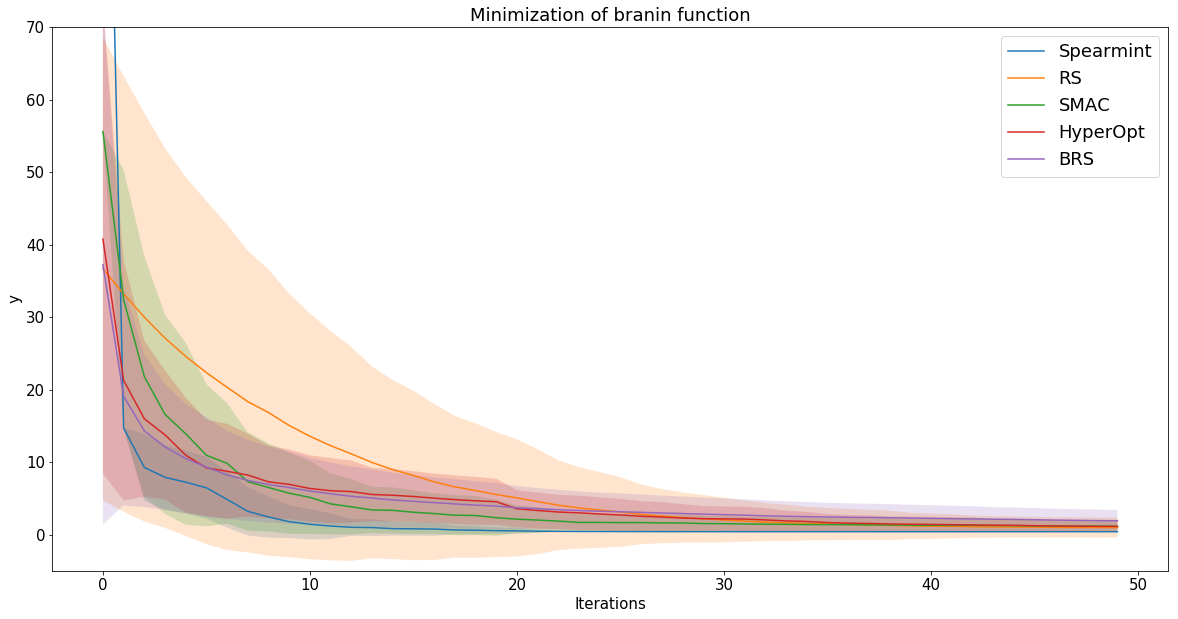

In [2]:
import csv
from matplotlib import pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import scipy.stats as stats
import numpy as np
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 15}

matplotlib.rc('font', **font)

CONF_INTERVALS = True

fig = plt.figure(figsize=(20, 10))
for optimizer in ["Spearmint","RS","SMAC","HyperOpt","BRS"]:

    results = []
    if optimizer == "RS":
        csvFile = csv.reader(open("RSBranin(50iters,1000runs,R=0.05).csv", "rb"))
    elif optimizer == "BRS":
        csvFile = csv.reader(open("BRSBranin(50iters,1000runs).csv", "rb"))
    else:
        csvFile = csv.reader(open(optimizer+"Branin(50iters,100runs).csv", "rb"))
    for row in csvFile:
        results.append(row[1])
    results = map(float, results)
    if optimizer == "Spearmint":
        for i in range(len(results)-1,-1,-1):
            if np.isnan(results[i]):
                del results[i]
    results = np.asarray(results)
    if optimizer == "RS" or optimizer == "BRS":
        results = np.reshape(results, (1000, 50)).T
    else:
        results = np.reshape(results, (100, 50)).T
    mean_results = []
    std = []
    for i in range(len(results)):
        mean_results.append(results[i].mean())
        std.append(np.std(results[i]))
    mean_results = np.asarray(mean_results).T
    plt.plot(range(len(mean_results)),mean_results,label=optimizer)
    if CONF_INTERVALS:
        plt.fill_between(range(len(mean_results)), mean_results-std, mean_results+std, alpha=0.2)
plt.ylim((-5,70))
plt.ylabel("y")
plt.xlabel("Iterations")
plt.legend(fontsize='large')
plt.title("Minimization of branin function")
# plt.savefig('branin.pdf')

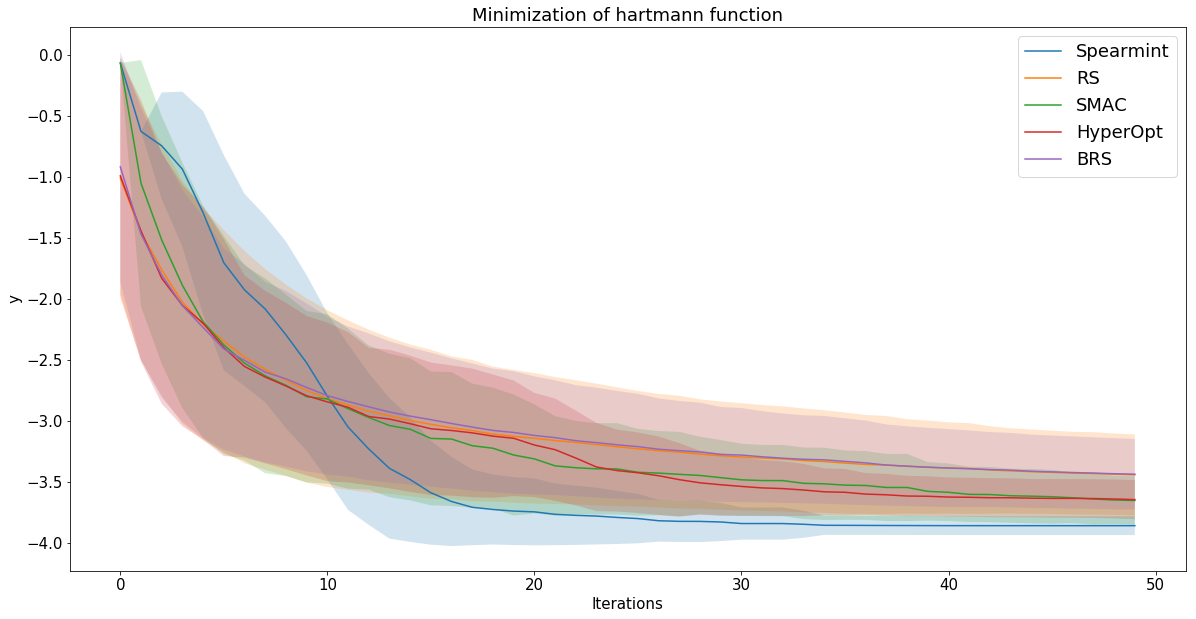

In [3]:
CONF_INTERVALS = True

fig = plt.figure(figsize=(20, 10))
for optimizer in ["Spearmint","RS","SMAC","HyperOpt","BRS"]:

    results = []
    if optimizer == "RS":
        csvFile = csv.reader(open("RSHartmann(50iters,1000runs,R=0.49).csv", "rb"))
    elif optimizer == "BRS":
        csvFile = csv.reader(open("BRSHartmann(50iters,1000runs).csv", "rb"))
    else:
        csvFile = csv.reader(open(optimizer+"Hartmann(50iters,100runs).csv", "rb"))
    for row in csvFile:
        results.append(row[1])
    results = map(float, results)
    if optimizer == "Spearmint":
        for i in range(len(results)-1,-1,-1):
            if np.isnan(results[i]):
                del results[i]
    results = np.asarray(results)
    if optimizer == "RS" or optimizer == "BRS":
        results = np.reshape(results, (1000, 50)).T
    else:
        results = np.reshape(results, (100, 50)).T
    mean_results = []
    std = []
    for i in range(len(results)):
        mean_results.append(results[i].mean())
        std.append(np.std(results[i]))
    mean_results = np.asarray(mean_results).T
    plt.plot(range(len(mean_results)),mean_results,label=optimizer)
    if CONF_INTERVALS:
        plt.fill_between(range(len(mean_results)), mean_results-std, mean_results+std, alpha=0.2)
# plt.ylim((0,70))
plt.ylabel("y")
plt.xlabel("Iterations")
plt.legend(fontsize='large')
plt.title("Minimization of hartmann function")
# plt.savefig('hartmann.pdf')

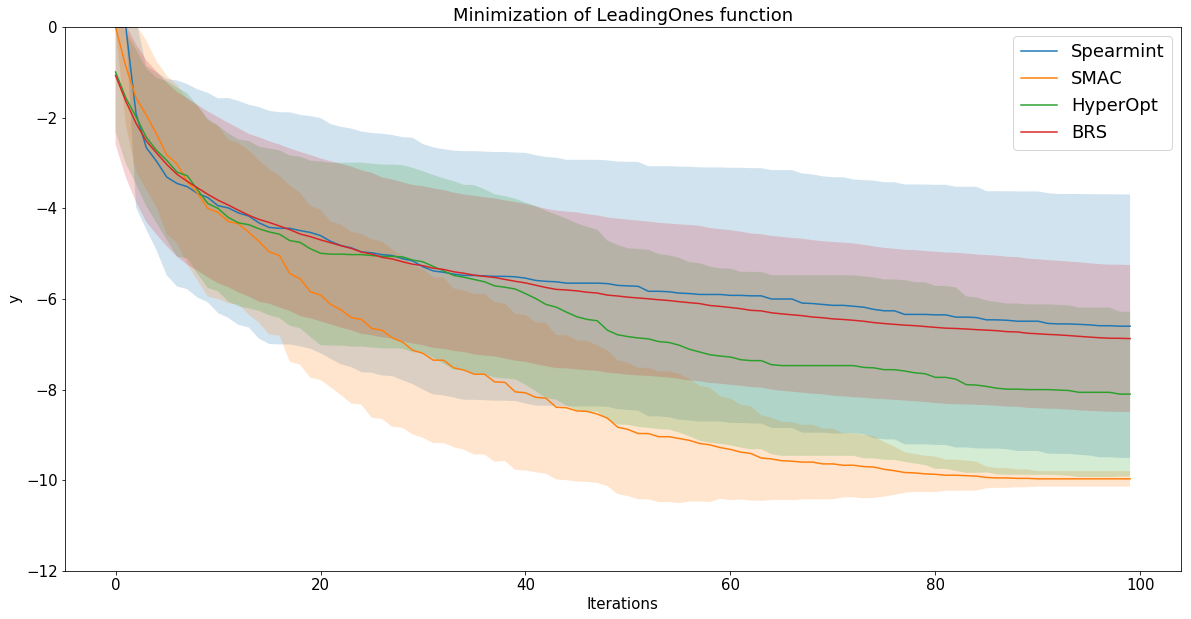

In [6]:
fig = plt.figure(figsize=(20, 10))
for optimizer in ["Spearmint","SMAC","HyperOpt","BRS"]:

    results = []
    if optimizer == "BRS":
        csvFile = csv.reader(open("BRSLeadOnes(100iters,1000runs).csv", "rb"))
    else:
        csvFile = csv.reader(open(optimizer+"LeadOnes(100iters,100runs).csv", "rb"))
    for row in csvFile:
        results.append(row[1])
    results = map(float, results)
    if optimizer == "Spearmint":
        for i in range(len(results)-1,-1,-1):
            if np.isnan(results[i]):
                del results[i]
    results = np.asarray(results)
    if optimizer == "RS" or optimizer == "BRS":
        results = np.reshape(results, (1000, 100)).T
    else:
        results = np.reshape(results, (100, 100)).T
    mean_results = []
    std = []
    for i in range(len(results)):
        mean_results.append(results[i].mean())
        std.append(np.std(results[i]))
    mean_results = np.asarray(mean_results).T
    plt.plot(range(len(mean_results)),mean_results,label=optimizer)
    if CONF_INTERVALS:
        plt.fill_between(range(len(mean_results)), mean_results-std, mean_results+std, alpha=0.2)
plt.ylim((-12,0))
plt.ylabel("y")
plt.xlabel("Iterations")
plt.legend(fontsize='large')
plt.title("Minimization of LeadingOnes function")
# plt.savefig('leadingones.pdf')